# Absolute Error 絕對誤差 與 Relative Error 相對誤差

先來上定義，假設 $y_i$ 是真實的值， $\hat{y}_i$ 是你的預測值 <br>

Absolute Error:

$$
|y_i - \hat{y}_i|
$$

Relative Error:

$$
\frac{y_i - \hat{y}_i}{y_i}
$$

只看公式沒什麼感覺，下面來舉個實際的例子，假設你要預估自己的身高，你的真實身高是 170 公分，但你心中認定你身高為完美的 180，我們來看看絕對誤差是多少

$$
|170-180| = 10
$$

實際值跟你想像的差了10公分，那如果我們說不要不要，我要改用公尺為單位，你的絕對誤差就成了 $|1.7-1.8|=0.1$ ，哇啊！似乎你的數值瞬間就進步了，
雖然你的預測什麼都沒變， 而且你說的也都是事實，但是話術下什麼都可以改變，所以有人說統計可以騙人，什麼人最容易被騙，就是半桶水的人最好騙了，
因為他只懂一點皮毛但是又不深入，你給他一些數據結果，他也不深入了解裡面的算法與數據，很容易就可以唬弄迷惑他的眼睛與思想。 <br>

如果我們改用相對誤差來看，不管用哪種單位結果都是相同的

$$
\frac{170 - 180}{170} = \frac{1.7 - 1.8}{1.7}
$$

那你會不會想說，相對誤差就一定比絕對誤差還好，我只能跟你說不一定，下面來說點小故事。




假設你的專長是做行銷的，某天你要去面試，你想要把你的能力展現給下一家的老闆看，如果你之前在大公司做有很高的知名度，
那你可以展現之前的輝煌數據，例如你曾做的行銷案，擁有千萬觀看量，賣出百萬績效，雖然你只是簡單照著公司SOP做出的案子，
根本毫無新意，這只是大公司光環下推出的產品，你就只是個小編，照著之前留下的模板修修改改，就依樣畫葫蘆推出了，
這絕不是你個人意志做出的創意，但是僅憑之前公司累積的名聲與聲望，就可以讓你做的專案效果良好，銷售成果如何其實和你完全無關，，其實不管誰來做都是千萬觀看，賣出百萬。 <br>

反過來說，如果你之前待的是家小公司，前面一個產品只賣出10個，你接手的新專案並無前例可以參考，處理之前案子的前輩還離職了，你的宣傳就只是寫幾個字PO在FB上，
你大部分時間都花在跟親朋好友宣傳你的產品，還拜託大家告訴大家，以這種口耳相傳的推廣方式，想當然耳最後只賣出100個而已，這時候你也不要難過，
只要心念一轉，去跟應徵的主考官吹噓你的成長性，胡謅在你的病毒式傳播策略下，成功的讓公司業績翻了 10 倍，這時候數據是不是就相對好看很多。好了，
這次不光教你們怎麼看評價指標，也教你們怎麼宣傳自己。 <br>

下面我們就來看看 scikit learn 提供了那些指標



# Mean Absolute Arror （ MAE ）

公式

$$
MAE(y,\hat{y}) = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$


這邊要提一下 scikit learn 有支援多輸出 （ multi output ）




In [1]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

display(mean_absolute_error(y_true, y_pred))

# multi output
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]

display(mean_absolute_error(y_true, y_pred))

display(mean_absolute_error(y_true, y_pred, multioutput='raw_values'))

display(mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7]))


0.5

0.75

array([0.5, 1. ])

0.85

# Mean Squared Error （ MSE ）

公式

$$
MSE(y,\hat{y}) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$


這邊要提一下 scikit learn 有支援多輸出 （ multi output ）



In [2]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

display(mean_squared_error(y_true, y_pred))

# multi output
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]

display(mean_squared_error(y_true, y_pred))

display(mean_squared_error(y_true, y_pred, multioutput='raw_values'))

display(mean_squared_error(y_true, y_pred, multioutput=[0.3, 0.7]))

0.375

0.7083333333333334

array([0.41666667, 1.        ])

0.825

# Mean Squared Logarithmic Error （ MSLE ）

公式

$$
MSLE(y,\hat{y}) = \frac{1}{n} \sum_{i=1}^n ( \log_e (1+y_i) - \log_e (1+\hat{y}_i) )^2
$$

我們可以看一下

$$
\log_e (1+y_i) - \log_e (1+\hat{y}_i) = \log_e \frac{1+y_i}{1+\hat{y}_i}
$$

他其實是相對的誤差，我們下面看一下差別，假設真實的值 $\hat{y}_i = 10$，不同的 $\hat{y}_i$ 差別是什麼。


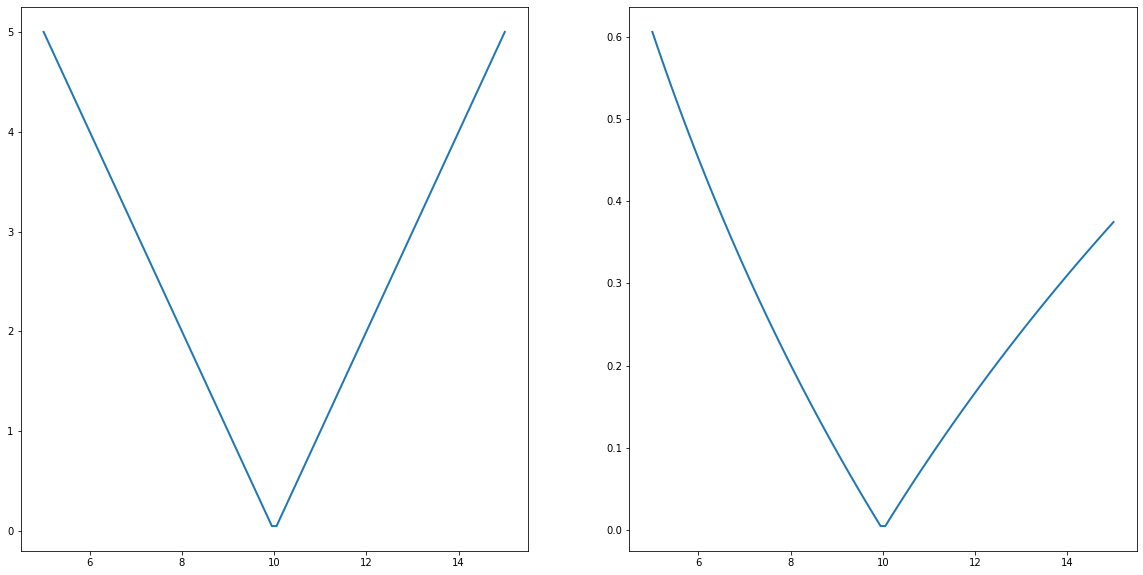

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 10))

x = np.linspace(5, 15, 100)
y_1 = abs(x-10)
y_2 = abs(np.log((1+x)/(1+10)))

# plot
plt.subplot(121)
plt.plot(x, y_1, linewidth=2.0)
plt.subplot(122)
plt.plot(x, y_2, linewidth=2.0)

plt.show()



我們可以看到他的差別，這個 MSLE 適合用來估計目標有可能呈指數成長的結果，例如人口或是薪水，下面我們進入實例。


In [30]:
from sklearn.metrics import mean_squared_log_error
y_true = [3, 5, 2.5, 7]
y_pred = [2.5, 5, 4, 8]
display(mean_squared_log_error(y_true, y_pred))


y_true = [[0.5, 1], [1, 2], [7, 6]]
y_pred = [[0.5, 2], [1, 2.5], [8, 8]]
display(mean_squared_log_error(y_true, y_pred))

display(mean_squared_log_error(y_true, y_pred, multioutput='raw_values'))

display(mean_squared_log_error(y_true, y_pred, multioutput=[0.3, 0.7]))



0.03973012298459379

0.044199361889160536

array([0.00462428, 0.08377444])

0.060029394179700345

# Mean Absolute Percentage Error （ MAPE ）

就是用來估計相對誤差的，下面來看公式

$$
MAPE(y,\hat{y}) = \frac{1}{n} \sum_{i=1}^n \frac{|y_i - \hat{y}_i|}{\max (\epsilon,|y_i|)}
$$

裡面的 $\epsilon$ 是任意小的正數，去避免分母為零。



In [31]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = [1, 10, 1e6]
y_pred = [0.9, 15, 1.2e6]

display(mean_absolute_percentage_error(y_true, y_pred))

# multi output
y_true = [[1, 2], [10, 9], [1e6, 1.1e6]]
y_pred = [[0.9, 1.1], [15, 17], [1.2e6, 1.2e7]]

display(mean_absolute_percentage_error(y_true, y_pred))

display(mean_absolute_percentage_error(y_true, y_pred, multioutput='raw_values'))

display(mean_absolute_percentage_error(y_true, y_pred, multioutput=[0.3, 0.7]))


0.26666666666666666

2.007996632996633

array([0.26666667, 3.7493266 ])

2.7045286195286193

# Median absolute error (MedAE)

接下來要介紹的是絕對值誤差的中位數，下面來看公式

$$
MedAE(y, \hat{y}) = median(|y_1 - \hat{y}_1|, \cdots, |y_n - \hat{y}_n|)
$$


In [32]:
from sklearn.metrics import median_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

median_absolute_error(y_true, y_pred)


0.5

# Max error

接下來要介紹的是最大誤差，下面來看公式

$$
MaxError(y, \hat{y}) = \max (|y_1 - \hat{y}_1|, \cdots, |y_n - \hat{y}_n|)
$$


In [33]:
from sklearn.metrics import max_error

y_true = [3, 2, 7, 1]
y_pred = [9, 2, 7, 1]

max_error(y_true, y_pred)


6

# Explained variance score

可解釋的 variance 的公式

$$
ExplainedVariance(y, \hat{y}) = 1 - \frac{Var\{y-\hat{y}\}}{Var\{y\}} 
= 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-0)^2}
$$


# $R^2$ score

$R^2$ 的公式

$$
ExplainedVariance(y, \hat{y}) = 1 - \frac{Var\{y-\hat{y}\}}{Var\{y\}} 
= 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\mu_y)^2}
$$


我們要提一下，如果 $\mu_y=0$，則上面兩個公式相等。



In [ ]:
# Explained variance score

from sklearn.metrics import explained_variance_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(explained_variance_score(y_true, y_pred))

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(explained_variance_score(y_true, y_pred, multioutput='raw_values'))

print(explained_variance_score(y_true, y_pred, multioutput=[0.3, 0.7]))


In [ ]:
# R2

from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print(r2_score(y_true, y_pred))

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(r2_score(y_true, y_pred, multioutput='variance_weighted'))

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(r2_score(y_true, y_pred, multioutput='uniform_average'))

print(r2_score(y_true, y_pred, multioutput='raw_values'))

print(r2_score(y_true, y_pred, multioutput=[0.3, 0.7]))
